In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

eps = 1e-3
x = np.linspace(0, 1, 1001)
x1 = np.linspace(0.01, 1, 991)

functions for step 1

In [11]:
def f1(x):
    return x**3

def f2(x):
    return abs(x - 0.2)

def f3(x):
    return x * np.sin(1 / x)

In [12]:
y1 = f1(x)
y2 = f2(x)
y3 = f3(x1)

exhaustive search, dichotomy search, and golden section search functions:

In [13]:
def exh_search(f, x):
    return x[np.argmin(f(x))]

def di(a, b, delta, eps, f):
    fx = 0
    fy = 0
    x_ = 0
    y_ = 0
    it = 0
    while round((b - a), 5) >= eps:
        it += 1
        x_ = (a + b - delta) / 2
        y_ = (a + b + delta) / 2
        fx = f(x_)
        fy = f(y_)
        if fx < fy:
            b = y_
        else:
            a = x_

    print(f'number of iterations: {it}')
    print(f'number of f(x) calculations: {2 * it}')
    return (x_ + y_) / 2

invphi = (math.sqrt(5) - 1) / 2  # 1 / phi
invphi2 = (3 - math.sqrt(5)) / 2  # 1 / phi^2
def gss(f, a, b, tol=1e-5):
    (a, b) = (min(a, b), max(a, b))
    h = b - a
    if h <= tol:
        return (a, b)

    # Required steps to achieve tolerance
    n = int(math.ceil(math.log(tol / h) / math.log(invphi)))
    print(f"number of iterations: {n}")
    print(f"number of f(x) calculations: {n + 1}")
    c = a + invphi2 * h
    d = a + invphi * h
    yc = f(c)
    yd = f(d)

    for k in range(n - 1):
        if yc < yd:
            b = d
            d = c
            yd = yc
            h = invphi * h
            c = a + invphi2 * h
            yc = f(c)
        else:
            a = c
            c = d
            yc = yd
            h = invphi * h
            d = a + invphi * h
            yd = f(d)

    if yc < yd:
        return (a, d)
    else:
        return (c, b)

exh_search for f1: 0.0
exh_search for f2: 0.2
exh_search for f3: 0.223
dichotomy for f1:
number of iterations: 11
number of f(x) calculations: 22
result: 0.0007380371093750001
dichotomy for f2:
number of iterations: 11
number of f(x) calculations: 22
result: 0.19985717773437495
dichotomy for f3:
number of iterations: 11
number of f(x) calculations: 22
result: 0.22235473632812497
golden section for f1
number of iterations: 15
number of f(x) calculations: 16
(0, 0.0007331374358574056)
golden section for f2
number of iterations: 15
number of f(x) calculations: 16
(0.19970674502565708, 0.20043988246151448)
golden section for f3
number of iterations: 15
number of f(x) calculations: 16
(0.22235669058885385, 0.2230824966503527)


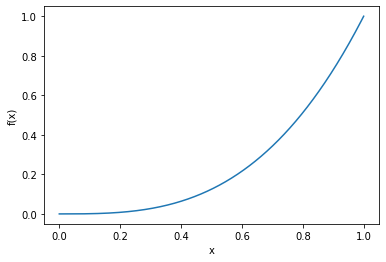

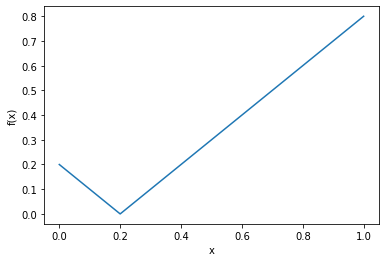

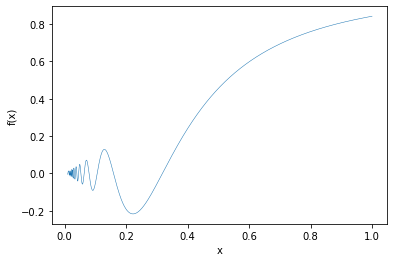

In [14]:
print(f'exh_search for f1: {exh_search(f1, x)}')
print(f'exh_search for f2: {exh_search(f2, x)}')
print(f'exh_search for f3: {exh_search(f3, x1)}')

print('dichotomy for f1:')
print(f'result: {di(x[0], x[len(x) - 1], eps / 2, eps, f1)}')
print('dichotomy for f2:')
print(f'result: {di(x[0], x[len(x) - 1], eps / 2, eps, f2)}')
print('dichotomy for f3:')
print(f'result: {di(x1[0], x1[len(x1) - 1], eps / 2, eps, f3)}')

print("golden section for f1")
print(gss(f1, 0, 1, 0.001))
print("golden section for f2")
print(gss(f2, 0, 1, 0.001))
print("golden section for f3")
print(gss(f3, 0.01, 1, 0.001))

plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

plt.plot(x1, y3, linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('plot.png')
plt.show()

TASK 2

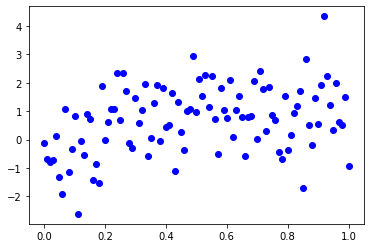

In [94]:
x = np.linspace(0, 1, 101)
alpha = np.random.rand()
beta = np.random.rand()
delta = np.random.normal(0, 1, 101)
y = alpha * x + beta + delta
plt.scatter(x, y, color='blue')
plt.show()

In [117]:
a_ = 0
b_ = 0.5

functions for part 2

In [66]:
def F1(a, b):
    return a * x + b

def F11(a, b, x):
    return a * x + b

def F2(a, b):
    return a / (1 + b * x)

def F22(a, b, x):
    return a / (1 + b * x)

def D(a, b, F):
    x_ = F(a, b)
    return np.inner(y - x_, y - x_)

def D1(a, b):
    res = 0.0
    for i in range(len(x)):
        res += (F11(a, b, x[i]) - y[i]) ** 2
    return res

def D2(a, b):
    res = 0.0
    for i in range(len(x)):
        res += (F22(a, b, x[i]) - y[i]) ** 2
    return res

def exh_search_2(F, supa, supb, eps):
    a = np.linspace(-supa, supa, int(2 * supa / eps + 1))
    b = np.linspace(-supb, supb, int(2 * supb / eps + 1))
    cx, cy = np.meshgrid(a, b)
    sh = (len(b), len(a))
    res = np.zeros(shape=sh)
    for i in range(np.shape(cx)[0]):
        for j in range(np.shape(cx)[1]):
            res[i, j] = D(cx[i, j], cy[i, j], F)
            # print(cx[i, j], cy[i, j])

    # print(np.around(res, decimals=0))
    ind = np.unravel_index(np.nanargmin(res), shape=sh)
    return cx[ind[0], ind[1]], cy[ind[0], ind[1]]

/tmp/ipykernel_9039/3513296193.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return a / (1 + b * x)
/tmp/ipykernel_9039/3513296193.py:8: RuntimeWarning: invalid value encountered in true_divide
  return a / (1 + b * x)


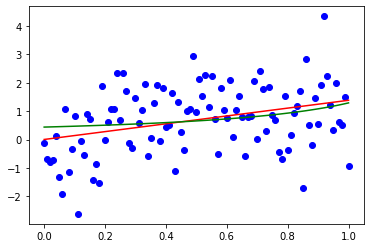

In [96]:
a0, b0 = exh_search_2(F1, 2, 2, eps)
a1, b1 = exh_search_2(F2, 2, 1, eps)
# print(a0, b0)
plt.scatter(x, y, color='blue')
plt.plot(x, F1(a0, b0), color='red')
plt.plot(x, F2(a1, b1), color='green')
plt.show()

Optimization terminated successfully.
Number of iterations:  56
Number of f evaluations:  112
[1.37923784 0.00532308]
Optimization terminated successfully.
Number of iterations:  107
Number of f evaluations:  205
[ 0.44148253 -0.65839974]


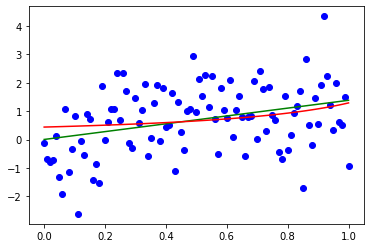

In [104]:
D11 = lambda x: D1(*x)
D22 = lambda x: D2(*x)

res1 = opt.minimize(D11, (0, 0), method='Nelder-Mead', tol=eps)
print(res1['message'])
print("Number of iterations: ", res1['nit'])
print("Number of f evaluations: ", res1['nfev'])
print(res1['x'])

plt.plot(x, F1(res1['x'][0], res1['x'][1]), color='green')

res2 = opt.minimize(D22, (0, 0), method='Nelder-Mead', tol=eps)
print(res2['message'])
print("Number of iterations: ", res2['nit'])
print("Number of f evaluations: ", res2['nfev'])
print(res2['x'])

plt.plot(x, F2(res2['x'][0], res2['x'][1]), color='red')
plt.scatter(x, y, color='blue')
plt.show()

Number of iterations:  20
1.3780000000000001 0.006000000000000227


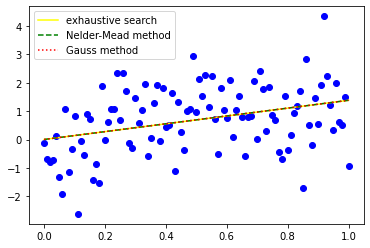

/tmp/ipykernel_9039/3513296193.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return a / (1 + b * x)


Number of iterations:  2
0.0 -1.998


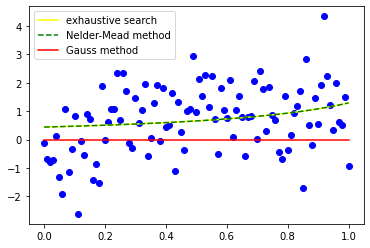

In [110]:
def gauss(x1, x2, F, eps):
    it = 0
    while True:
        it += 1
        x1p = x1
        x2p = x2
        a = np.linspace(-2, 2, int(2 / eps + 1))
        b = np.linspace(-2, 2, int(2 / eps + 1))

        res = np.zeros(shape=np.shape(b))
        for i in range(len(b)):
            res[i] = F(x1, b[i])
        index = np.nanargmin(res)
        x2 = b[index]

        res = np.zeros(shape=np.shape(b))
        for i in range(len(a)):
            res[i] = F(a[i], x2)
        index = np.nanargmin(res)
        x1 = a[index]
        if np.sqrt((x1 - x1p)**2 + (x2-x2p)**2) < eps:
            break

    print("Number of iterations: ", it)
    return x1, x2

Number of iterations:  20
1.3780000000000001 0.006000000000000227


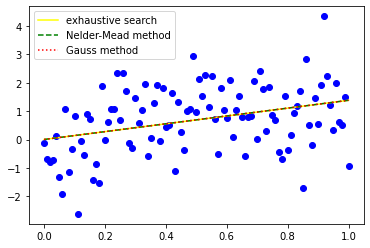

In [112]:
a, b = gauss(0, 0, D1, eps)
print(a, b)
plt.plot(x, F1(a0, b0), color='yellow', label='exhaustive search')
plt.plot(x, F1(res1['x'][0], res1['x'][1]), '--', color='green', label='Nelder-Mead method')
plt.plot(x, F1(a, b), ':', color='red', label='Gauss method')
plt.scatter(x, y, color='blue')
plt.legend()
plt.savefig('plot1.png')


In [ ]:
a, b = gauss(0, 0, D2, eps)
print(a, b)
plt.plot(x, F2(a1, b1), color='yellow', label='exhaustive search')
plt.plot(x, F2(res2['x'][0], res2['x'][1]), '--', color='green', label='Nelder-Mead method')
plt.plot(x, F2(a, b), color='red', label='Gauss method')
plt.scatter(x, y, color='blue')
plt.legend()
plt.savefig('plot2.png')
plt.show()